### Global Power Plant

Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 

Downlaod Files:
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

### Importing Liberary

In [131]:
#data lib
import pandas as pd
import numpy as np
%matplotlib inline

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

#models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#classification 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,classification_report
#model save
import pickle
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [214]:
data=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
pd.set_option('max_columns', 45)
data.sample(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
554,IND,India,Nargund Wind Farm,WRI1026352,7.2,15.7319,75.3789,Wind,NaN,NaN,NaN,NaN,Bhoruka Power,CDM,https://cdm.unfccc.int/Projects/DB/PJR%20CDM13...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,IND,India,MANGLAM CEMENT,WRI1019892,25.0,24.7176,75.9522,Coal,NaN,NaN,NaN,NaN,Manglam Cement ltd,Manglam Cement ltd,http://www.mangalamcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,IND,India,BAGLIHAR HEP,IND0000020,450.0,33.1815,75.3155,Hydro,NaN,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,2785.80100,2925.21045,2985.1393,2173.63720,2494.17645,Central Electricity Authority,NaN
53,IND,India,BANSAGAR (I),IND0000029,315.0,24.1917,81.2875,Hydro,NaN,NaN,NaN,1991.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1650.46620,1075.95320,571.6076,1232.82490,542.64315,Central Electricity Authority,NaN
422,IND,India,LIGANAMAKKI,IND0000232,55.0,14.1704,74.8388,Hydro,NaN,NaN,NaN,1979.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,266.60030,254.98865,118.3453,105.11180,124.92225,Central Electricity Authority,NaN
885,IND,India,VRL Wind Farm,WRI1026103,42.5,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/SGS-UKL1225...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,IND,India,PRIYADARSHNI JURALA,IND0000345,234.0,16.3328,77.7036,Hydro,NaN,NaN,NaN,2009.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,269.43605,223.52675,30.2679,210.93005,216.31300,Central Electricity Authority,NaN
788,IND,India,TALWANDI SABO,IND0000440,1980.0,29.9240,75.2372,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,NaN,1423.72450,2850.9900,6618.71540,7915.70000,Central Electricity Authority,NaN
446,IND,India,MADHAVAMANTRI,IND0000244,4.5,12.2135,77.0225,Hydro,NaN,NaN,NaN,2003.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,IND,India,Devgarh Wind Farm,WRI1026089,37.5,23.9640,74.6215,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/filestorage/Y/I/R/YIR8M...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Overview

In [215]:
data.shape

(908, 25)

Dataset have 908 observations & 25 features.

In [216]:
pd.DataFrame(data.columns)

,0
0,country
1,country_long
2,name
3,gppd_idnr
4,capacity_mw
5,latitude
6,longitude
7,primary_fuel
8,other_fuel1
9,other_fuel2


### Data Cleaning

In [217]:
data.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In first sight its cleary showing that its 1 country data so we can drop features country,country_long

name & gppd_idnr having unique values so we can drop these features as well.

will do futher analysis after removing these features for now.

In [218]:
data.drop(columns=['country','country_long','name','gppd_idnr'],inplace=True)

### Null Testing

In [219]:
data.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Few features are having approximately all values null so removing these features.

In [220]:
data.drop(columns=['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],inplace=True)

In [221]:
print(data.year_of_capacity_data.value_counts())
#feature year_of_capacity_data have only same value & feature have just site url so use of it so we can remove these features as well.


2018.0    520
Name: year_of_capacity_data, dtype: int64


In [222]:
data.drop(columns=['year_of_capacity_data','url'],inplace=True)

In [223]:
data.nunique()

capacity_mw               365
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
geolocation_source          3
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

In [224]:
print(data.generation_data_source.value_counts())
#feature generation_data_source also have single value so removing it as well

Central Electricity Authority    450
Name: generation_data_source, dtype: int64


In [228]:
data.drop(columns=['generation_data_source'],inplace=True)

In [229]:
data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  566
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

feature 'owner' is nominal data and having  62% null & other_fuel1 having 78% null so removing these features as well.

In [230]:
data.drop(columns=['owner','other_fuel1'],inplace=True)

In [231]:
#data.drop([data['latitude'].isnull()],axis=0)
data.drop(data[data['latitude'].isnull()].index, inplace = True)

In [232]:
#deleting rows where all generation feature have nan value.
data.drop(data[data['generation_gwh_2013'].isna() & data['generation_gwh_2014'].isna() & data['generation_gwh_2015'].isna() & data['generation_gwh_2016'].isna() & data['generation_gwh_2017'].isna()].index,inplace=True)

In [233]:
data.isna().sum()

capacity_mw             0
latitude                0
longitude               0
primary_fuel            0
commissioning_year      0
source                  0
geolocation_source      0
generation_gwh_2013    60
generation_gwh_2014    43
generation_gwh_2015    21
generation_gwh_2016    11
generation_gwh_2017     7
dtype: int64

Removed entire rows where it was null in all generations columns as we can treat these much null value, it can lead our model in wrong direction.

### Imputing Data

In [234]:
from sklearn.impute import SimpleImputer

In [235]:
data.reset_index(inplace=True)

In [236]:
si=SimpleImputer()

In [237]:
data.iloc[:,8:13]=si.fit_transform(data.iloc[:,8:13])

In [238]:
data.isna().sum()

index                  0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [239]:
data.nunique()

index                  438
capacity_mw            222
latitude               417
longitude              416
primary_fuel             5
commissioning_year      67
source                   1
geolocation_source       1
generation_gwh_2013    363
generation_gwh_2014    373
generation_gwh_2015    395
generation_gwh_2016    400
generation_gwh_2017    403
dtype: int64

having 2 features which have single value , so removing these.

In [240]:
data.drop(columns=['source','geolocation_source','index'],inplace=True)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          438 non-null    float64
 1   latitude             438 non-null    float64
 2   longitude            438 non-null    float64
 3   primary_fuel         438 non-null    object 
 4   commissioning_year   438 non-null    float64
 5   generation_gwh_2013  438 non-null    float64
 6   generation_gwh_2014  438 non-null    float64
 7   generation_gwh_2015  438 non-null    float64
 8   generation_gwh_2016  438 non-null    float64
 9   generation_gwh_2017  438 non-null    float64
dtypes: float64(9), object(1)
memory usage: 34.3+ KB


We have a non-numerical feature , so we will encode it.

In [242]:
data['primary_fuel'].value_counts()

Coal       185
Hydro      179
Gas         57
Oil          9
Nuclear      8
Name: primary_fuel, dtype: int64

### Data Duplicacy Test

In [244]:
data.duplicated().sum()

0

No duplicacy in dataset

### Encoding

In [245]:
from sklearn.preprocessing import LabelEncoder

In [246]:
enc=LabelEncoder()

In [247]:
data['primary_fuel']=enc.fit_transform(data['primary_fuel'])

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          438 non-null    float64
 1   latitude             438 non-null    float64
 2   longitude            438 non-null    float64
 3   primary_fuel         438 non-null    int32  
 4   commissioning_year   438 non-null    float64
 5   generation_gwh_2013  438 non-null    float64
 6   generation_gwh_2014  438 non-null    float64
 7   generation_gwh_2015  438 non-null    float64
 8   generation_gwh_2016  438 non-null    float64
 9   generation_gwh_2017  438 non-null    float64
dtypes: float64(9), int32(1)
memory usage: 32.6 KB


Dataset cleaned now null null values & all features are numeric only.

### Describe Dataset

In [249]:
data.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,622.645527,21.741221,79.471989,1.084475,1997.794521,2338.682337,2455.203873,2455.829322,2498.160219,2588.766230
std,713.169755,6.644245,5.129559,1.041336,16.714284,3543.163178,3830.282701,4109.294724,4134.961528,4195.199219
min,25.000000,8.169100,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.812500,16.787950,76.271100,0.000000,1988.000000,292.260401,269.057950,209.949757,196.703125,189.701725
50%,392.000000,22.302700,78.236600,1.000000,2002.000000,1308.429975,1153.775115,856.973500,825.519000,862.067375
75%,997.500000,26.484775,82.456000,2.000000,2012.000000,2352.282584,2713.175000,2953.201925,3262.699250,3289.931425
max,4760.000000,34.649000,95.408000,4.000000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


All features have equal count.

genaration gwh min value showing 0 which seems to be an outlier.. will check it.

In [250]:
data.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.023899,-0.019917,-0.479200,0.294188,0.778204,0.822247,0.841878,0.877058,0.892583
latitude,0.023899,1.000000,0.124169,-0.013802,0.139653,0.047879,0.057843,0.047160,0.040304,0.039318
longitude,-0.019917,0.124169,1.000000,-0.157500,0.141749,0.016063,0.012840,0.022219,0.049672,0.049110
primary_fuel,-0.479200,-0.013802,-0.157500,1.000000,-0.416693,-0.373539,-0.387675,-0.388181,-0.406703,-0.410132
commissioning_year,0.294188,0.139653,0.141749,-0.416693,1.000000,0.129691,0.155520,0.173847,0.200822,0.204670
generation_gwh_2013,0.778204,0.047879,0.016063,-0.373539,0.129691,1.000000,0.963088,0.896047,0.873455,0.830679
generation_gwh_2014,0.822247,0.057843,0.012840,-0.387675,0.155520,0.963088,1.000000,0.953689,0.926106,0.892179
generation_gwh_2015,0.841878,0.047160,0.022219,-0.388181,0.173847,0.896047,0.953689,1.000000,0.969667,0.929147
generation_gwh_2016,0.877058,0.040304,0.049672,-0.406703,0.200822,0.873455,0.926106,0.969667,1.000000,0.965147
generation_gwh_2017,0.892583,0.039318,0.049110,-0.410132,0.204670,0.830679,0.892179,0.929147,0.965147,1.000000


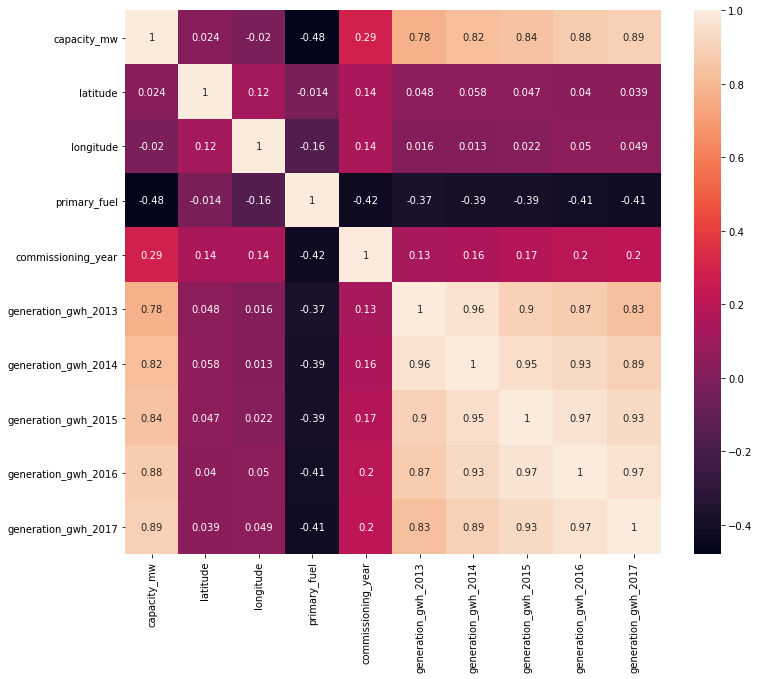

In [251]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

plt.show()

Target 'capacity_mw' dont have and relation with latitude,langitude which so we can remove these features as well.

Rest all feature have postive relation with data target.

Mulicollinearity clear shown between generation yearsbut as we have very small dataset, so we kept it as its.

2nd predictor primary fuel have negative relation with all features.

# Distribution Plot

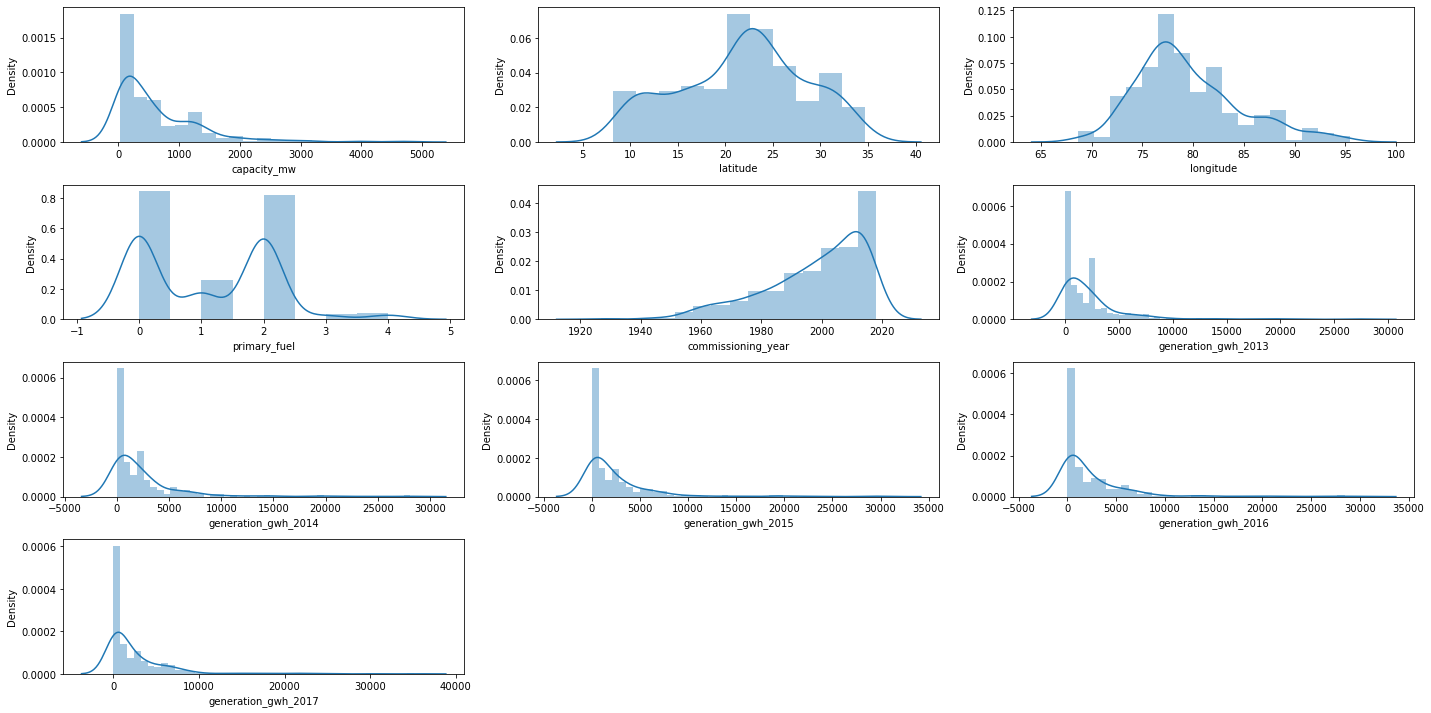

In [252]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[col])
        
    plotnumber+=1
    
plt.tight_layout()

with the help of these plots we can see features are normally distributed but because we do have very less records so cant afford to loose and records from here.

### Boxplot

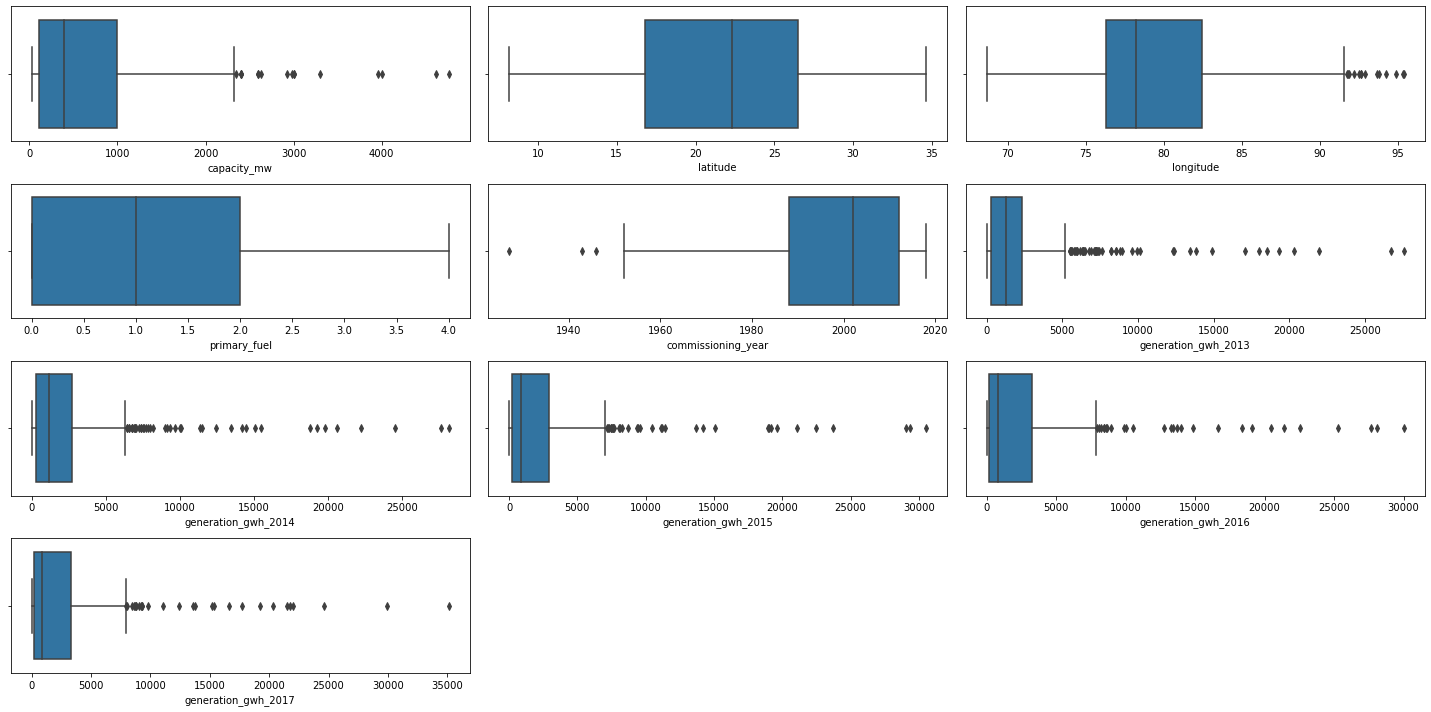

In [253]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[col])
        
    plotnumber+=1
    
plt.tight_layout()

In boxplot also we can see many outliers are there but we are not removing these due to very less data.

### Correlation with scatterplot

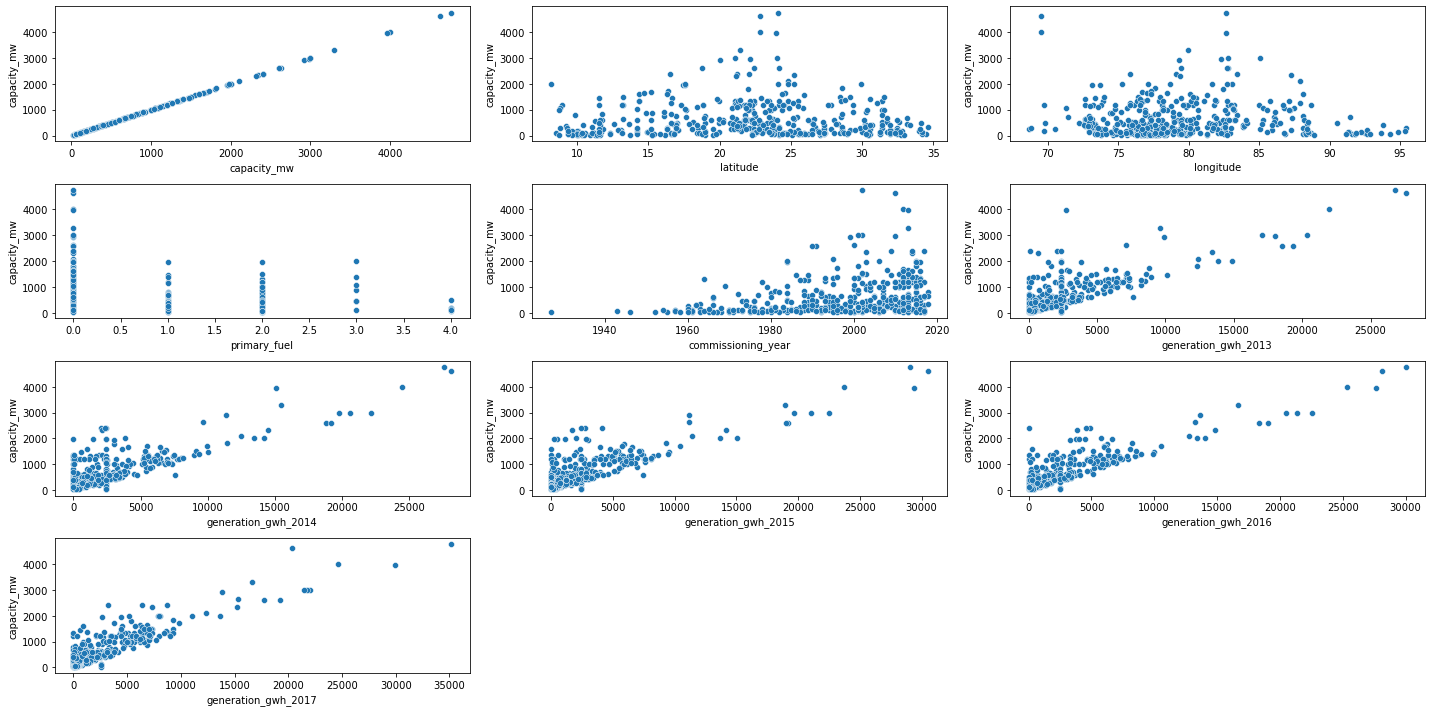

In [254]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.scatterplot(x=data[col],y=data['capacity_mw'])
        
    plotnumber+=1
    
plt.tight_layout()

We see latitude, longitude dont have any relation with target, same we observed with heatmap. so here we are removeing these 2 features.

In [255]:
data.drop(columns=['latitude','longitude'],inplace=True)

In [256]:
#dataset split

X=data.drop(columns=['capacity_mw'])
y=data.capacity_mw

In [257]:
scale=StandardScaler()
x_scale=scale.fit_transform(X)

In [258]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=40)

In [259]:
lr=LinearRegression()
rfr=RandomForestRegressor()
svr=SVR()
knn=KNeighborsRegressor()

In [260]:
lr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
svr.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [261]:
print(lr.score(x_train,y_train)*100)
print(rfr.score(x_train,y_train)*100)
print(svr.score(x_train,y_train)*100)
print(knn.score(x_train,y_train)*100)

80.8646837619728
97.30041319904494
-4.429427604545921
86.54243020361909


In [262]:
#lr score

y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

84.78198102755555


In [263]:
#rfr score

y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

87.12357018960759


In [264]:
#svr score

y_pred=svr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

3.399509634654796


In [265]:
#knn score

y_pred=knn.predict(x_test)
print(r2_score(y_test,y_pred)*100)

83.84257799933962


In [266]:
from sklearn.model_selection import cross_val_score


print('Linear Regression score:',np.mean(cross_val_score(lr,x_scale,y))*100)

print('Random Forest score:',np.mean(cross_val_score(rfr,x_scale,y))*100)

print('KNN score:',np.mean(cross_val_score(knn,x_scale,y))*100)

print('svr score:',np.mean(cross_val_score(svr,x_scale,y))*100)

Linear Regression score: 79.57487076827776
Random Forest score: 81.26375507285267
KNN score: 78.80135826005224
svr score: -3.8777935067770315


### Random forest training, testing & cross validation score is highest so we will go with it.

### Hyperparameter Tunning

In [267]:
params={'n_estimators':[5,10,25,40,70,100],
        'criterion':['mse','mae'],
        'min_samples_split':[1,2,6,12],
        'min_samples_leaf':[2,5,10]      
        
    
}

grd=GridSearchCV(rfr,param_grid=params)
grd.fit(x_train,y_train)
grd.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 5}

In [268]:
rfr=RandomForestRegressor(criterion='mae',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 25)

In [269]:
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

87.88054912352908


We are able to increase score using hyperparameter tunning

### Final Score

In [270]:
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

print('cv_score for RandomForestRegressor: ', np.mean(cross_val_score(rfr,x_train,y_train)*100))
print('R2 Score: ',r2_score(y_test,y_pred)*100)
print('Mean Square Error: ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

cv_score for RandomForestRegressor:  78.72134056430492
R2 Score:  87.80596609472965
Mean Square Error:  56679.26794205943
Mean Absolute Error:  167.06454509090906


### Model2 Training with same data set , Target:primary_fuel(classification)

### Data Imbalancing Test(Classification)

In [271]:
data.head()

,capacity_mw,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,135.0,1,2004.0,631.777928,617.789264,843.7470,886.004428,663.774500
1,1800.0,0,2015.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736
2,250.0,0,2005.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000
3,60.0,2,1970.0,147.568450,157.558250,152.1952,61.421350,89.629600
4,192.0,2,2010.0,696.738800,674.391100,721.3352,675.724400,679.594950


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

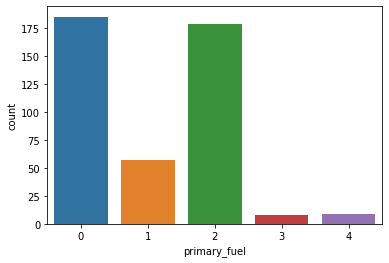

In [272]:
sns.countplot(data['primary_fuel'])

In [273]:
data['primary_fuel'].value_counts()

0    185
2    179
1     57
4      9
3      8
Name: primary_fuel, dtype: int64

its multiple values classification ,data is imbalance & we have very less observations for (1,4,3) classes, so we need to perform sampling for balancing it. 

### Data Balancing

In [274]:
from sklearn.utils import resample

In [275]:
class1=data[data.primary_fuel==1]
class4=data[data.primary_fuel==4]
class3=data[data.primary_fuel==3]

bal=data[(data['primary_fuel']==0)|(data['primary_fuel']==2)]

In [276]:
upclass1=resample(class1,n_samples=175,random_state=25,replace=True)
upclass4=resample(class4,n_samples=175,random_state=25,replace=True)
upclass3=resample(class3,n_samples=175,random_state=25,replace=True)

In [277]:
data=pd.concat([upclass1,upclass4,upclass3,bal],axis=0)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

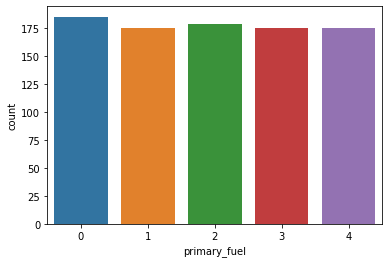

In [278]:
sns.countplot(data['primary_fuel'])

In [279]:
data['primary_fuel'].value_counts()

0    185
2    179
1    175
3    175
4    175
Name: primary_fuel, dtype: int64

Data imbalance problem solved now.

In [281]:
data.shape

(889, 8)

### Split Data

In [282]:
#data split
X_clf=data.drop(columns=['primary_fuel'])
y_clf=data.primary_fuel

### Scaling

In [283]:
#scaling
scale=StandardScaler()
x_scale=scale.fit_transform(X_clf)

### Train Test Split

In [284]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y_clf,random_state=270,test_size=0.25)

### Model Building

In [285]:
clf=LogisticRegression()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()

In [286]:
clf.fit(x_train,y_train)
dt.fit(x_train,y_train)
rfc.fit(x_train,y_train)

RandomForestClassifier()

### Evaluation

In [287]:
#logistic regression
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6053811659192825

In [288]:
#Decision Tree
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9192825112107623

In [289]:
#Random Forest Classifier
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9327354260089686

### Cross Validation

In [290]:
print('cv_score for LogisticRegression: ', np.mean(cross_val_score(clf,x_train,y_train)*100))
print('\ncv_score for DecisionTreeClassifier: ', np.mean(cross_val_score(dt,x_train,y_train)*100))
print('\ncv_score for RandomForestClassifier: ', np.mean(cross_val_score(rfc,x_train,y_train)*100))

cv_score for LogisticRegression:  59.157221411738306

cv_score for DecisionTreeClassifier:  84.53372236561553

cv_score for RandomForestClassifier:  86.78599483784087


### RandomForestClassifier model is performing best amongs all, and getting cv score. around 86%.

### Hyper Parameter Tunning

In [291]:
params={'n_estimators':[10,20,50,100],
        'criterion':['gini','entropy'],
        'min_samples_split':[1,2,5,10],
        'min_samples_leaf':[1,3,5]
          
}

In [292]:
grd=GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
grd.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [293]:
rfc=RandomForestClassifier(criterion= 'gini',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 50)

In [294]:
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9282511210762332

### Score improved after tunning parameters in Random Forest 93%

### Final Score-Classification model with target primary_fuel

In [296]:
print('cv_score for RandomForestRegressor: ', np.mean(cross_val_score(rfc,x_train,y_train)*100))
print('R2 Score: ',accuracy_score(y_test,y_pred)*100)
print('Mean Square Error: ',classification_report(y_test,y_pred))

cv_score for RandomForestRegressor:  85.88822803276848
R2 Score:  93.72197309417041
Mean Square Error:                precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.90      0.96      0.93        46
           2       0.91      0.86      0.89        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        41

    accuracy                           0.94       223
   macro avg       0.94      0.94      0.94       223
weighted avg       0.94      0.94      0.94       223



Since its multiple label classfication so not forming AUC-ROC

### Model Save

In [299]:
filename='Global_plant_classifier.pickle'

pickle.dump(rfc,open(filename,'wb'))

In [300]:
filename='Global_plant_regression.pickle'

pickle.dump(rfr,open(filename,'wb'))